In [1]:
import matplotlib.pyplot as plt

In [2]:
def arduino_to_voltage(arduino_values):
    voltage_FSR = (arduino_values / 1023)*5
    return voltage_FSR

In [3]:
weights = [0, 120, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000]
value = [0, 140, 300, 580, 640, 740, 770, 800, 870, 880, 890, 900, 905, 915, 927, 925, 935, 945]
normalized_value = [x / 1023 * 5 for x in value]

def get_force (yvalues):
    x = weights
    y = normalized_value
    xinterp = np.interp(yvalues, y, x)
    
    return xinterp

In [5]:
force_value = [580, 585, 590, 592, 594, 597, 598, 599, 600, 600, 600, 599, 597, 596, 592, 591, 587, 583, 575, 542, 534, 524, 519, 515,511, 510, 508, 508, 509, 512, 514, 518, 523, 530, 532, 560, 579]
angle = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360]


force_value = arduino_to_voltage(force_value)
force_value = get_force(force_value)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

Text(0, 0.5, 'Force')

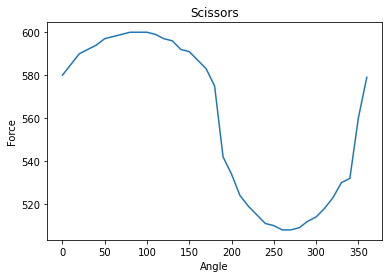

In [6]:
plt.plot(angle, force_value)
plt.title("Scissors")
plt.xlabel("Angle")
plt.ylabel("Force")